In [15]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,4)
import pylab as plt
from astrometry.libkd.spherematch import *
from astrometry.util.fits import *
import numpy as np
from astrometry.util.starutil_numpy import *
from astrometry.util.plotutils import *
from glob import glob
from collections import Counter
import os

In [17]:
# 449
central = 449
ra_center,dec_center = 181.1464004, 3.9564231
# pixel size of cutouts -- replace with galaxy size??
size = 384

In [18]:
# where to sample the sky relative to the central galaxy
# 10 arcmin radius
radius = 10. / 60.
dra = radius / np.cos(np.deg2rad(dec_center))
ddec = radius
# how many samples to draw
nspots = 25
angles = np.linspace(0, 2.*np.pi, nspots, endpoint=False)
ras = ra_center + dra*np.sin(angles)
decs = dec_center + ddec*np.cos(angles)

In [21]:
outdir_base = '/global/cscratch1/sd/dstn/sky-variance/central-%08i' % central
survey_dir = '/global/cscratch1/sd/dstn/dr7-depthcut'
for i,(r,d) in enumerate(zip(ras, decs)):
    cmd = ('cd /global/homes/d/dstn/legacypipe/py && python legacypipe/runbrick.py --radec %.4f %.4f --width %i --height %i --pixscale 0.262 --outdir %s/sky-%i --skip-calibs -s image_coadds --blob-image --survey-dir %s' %
        (r, d, size, size, outdir_base, i, survey_dir))
    print(cmd)
    #rtn = os.system(cmd)
    #print('Return val', rtn)
    #break

cd /global/homes/d/dstn/legacypipe/py && python legacypipe/runbrick.py --radec 181.1464 4.1231 --width 384 --height 384 --pixscale 0.262 --outdir /global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-0 --skip-calibs -s image_coadds --blob-image --survey-dir /global/cscratch1/sd/dstn/dr7-depthcut
cd /global/homes/d/dstn/legacypipe/py && python legacypipe/runbrick.py --radec 181.1879 4.1179 --width 384 --height 384 --pixscale 0.262 --outdir /global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-1 --skip-calibs -s image_coadds --blob-image --survey-dir /global/cscratch1/sd/dstn/dr7-depthcut
cd /global/homes/d/dstn/legacypipe/py && python legacypipe/runbrick.py --radec 181.2269 4.1025 --width 384 --height 384 --pixscale 0.262 --outdir /global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-2 --skip-calibs -s image_coadds --blob-image --survey-dir /global/cscratch1/sd/dstn/dr7-depthcut
cd /global/homes/d/dstn/legacypipe/py && python legacypipe/runbrick.py --radec 181.2608 4.0

In [40]:
fns = glob(os.path.join(outdir_base, 'sky-*', 'metrics', 'cus', 'blobs-*'))
fns.sort()
len(fns)

25

In [41]:
fns

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-0/metrics/cus/blobs-custom-181146p04123.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-1/metrics/cus/blobs-custom-181187p04117.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-10/metrics/cus/blobs-custom-181244p03821.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-11/metrics/cus/blobs-custom-181207p03801.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-12/metrics/cus/blobs-custom-181167p03791.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-13/metrics/cus/blobs-custom-181125p03791.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-14/metrics/cus/blobs-custom-181084p03801.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-15/metrics/cus/blobs-custom-181048p03821.fits.gz',
 '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-16/metrics/cus/blobs-custom-181017p0

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-0/coadd/cus/custom-181146p04123/legacysurvey-custom-181146p04123-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-0/coadd/cus/custom-181146p04123/legacysurvey-custom-181146p04123-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-0/coadd/cus/custom-181146p04123/legacysurvey-custom-181146p04123-image-z.fits.fz']
int32 (384, 384)


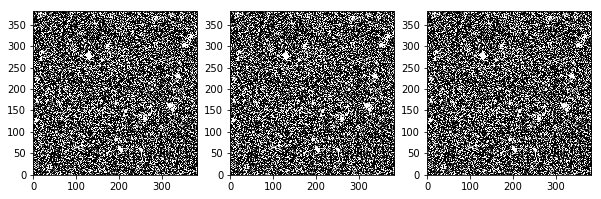

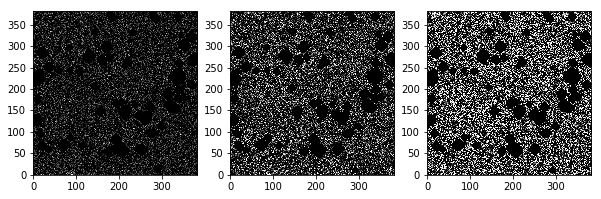

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-1/coadd/cus/custom-181187p04117/legacysurvey-custom-181187p04117-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-1/coadd/cus/custom-181187p04117/legacysurvey-custom-181187p04117-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-1/coadd/cus/custom-181187p04117/legacysurvey-custom-181187p04117-image-z.fits.fz']
int32 (384, 384)


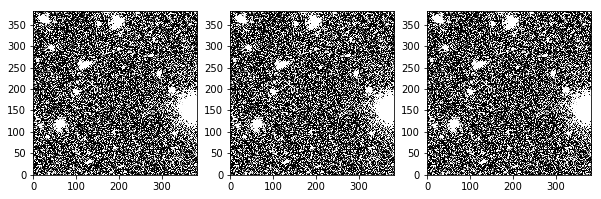

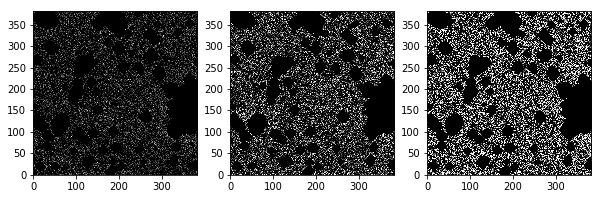

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-10/coadd/cus/custom-181244p03821/legacysurvey-custom-181244p03821-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-10/coadd/cus/custom-181244p03821/legacysurvey-custom-181244p03821-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-10/coadd/cus/custom-181244p03821/legacysurvey-custom-181244p03821-image-z.fits.fz']
int32 (384, 384)


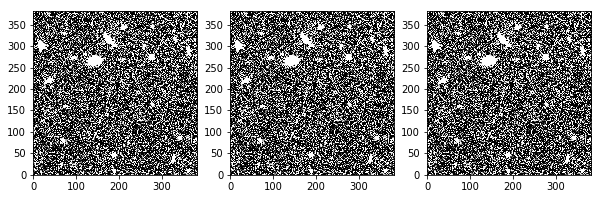

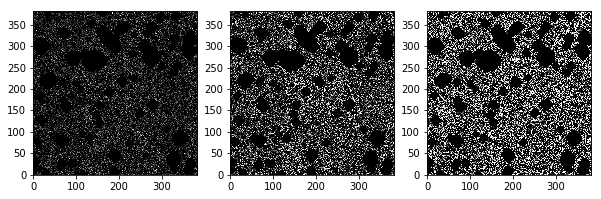

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-11/coadd/cus/custom-181207p03801/legacysurvey-custom-181207p03801-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-11/coadd/cus/custom-181207p03801/legacysurvey-custom-181207p03801-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-11/coadd/cus/custom-181207p03801/legacysurvey-custom-181207p03801-image-z.fits.fz']
int32 (384, 384)
['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-12/coadd/cus/custom-181167p03791/legacysurvey-custom-181167p03791-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-12/coadd/cus/custom-181167p03791/legacysurvey-custom-181167p03791-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-12/coadd/cus/custom-181167p03791/legacysurvey-custom-181167p03791-image-z.fits.fz']
int32 (384, 384)
['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-13/coadd/cus/custom-181125p03791

['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-8/coadd/cus/custom-181297p03885/legacysurvey-custom-181297p03885-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-8/coadd/cus/custom-181297p03885/legacysurvey-custom-181297p03885-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-8/coadd/cus/custom-181297p03885/legacysurvey-custom-181297p03885-image-z.fits.fz']
int32 (384, 384)
['/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-9/coadd/cus/custom-181275p03850/legacysurvey-custom-181275p03850-image-g.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-9/coadd/cus/custom-181275p03850/legacysurvey-custom-181275p03850-image-r.fits.fz', '/global/cscratch1/sd/dstn/sky-variance/central-00000449/sky-9/coadd/cus/custom-181275p03850/legacysurvey-custom-181275p03850-image-z.fits.fz']
int32 (384, 384)


In [46]:
skyfluxes = []
apertures = np.arange(5, 150+1, 5)
import photutils

for i,fn in enumerate(fns):
    blobfn = fn
    basedir = os.path.dirname(os.path.dirname(os.path.dirname(fn)))
    imgfns = []
    for band in 'grz':
        pat = os.path.join(basedir, 'coadd', 'cus', 'custom-*', 'legacysurvey-custom-*-image-%s.fits.fz' % band)
        imgfn = glob(pat)
        if len(imgfn) != 1:
            print('For pattern', pat, 'got', imgfn)
            break
        imgfns.append(imgfn[0])
    if len(imgfns) != 3:
        continue
    print(imgfns)
    blobs = fitsio.read(blobfn)
    print(blobs.dtype, blobs.shape)
    imgs = []
    for imgfn in imgfns:
        img = fitsio.read(imgfn)
        imgs.append(img)

    if i < 3:
        for ib,(band,imgfn) in enumerate(zip('grz', imgfns)):
            plt.subplot(1,3,1+ib)
            plt.imshow(img, interpolation='nearest', origin='lower', vmin=0, vmax=0.01, cmap='gray')
        plt.show()
        for ib,img in enumerate(imgs):
            plt.subplot(1,3,1+ib)
            plt.imshow(img * (blobs == -1), interpolation='nearest', origin='lower', vmin=0, vmax=0.01, cmap='gray')
        plt.show()

    apfluxes = np.zeros((len(imgs), len(apertures)))
    cx,cy = size//2, size//2
    for ii,img in enumerate(imgs):
        for ia,ap in enumerate(apertures):
            aper = photutils.CircularAperture((cx, cy), ap)
            p = photutils.aperture_photometry(img, aper, mask=(blobs > -1))
            f = p.field('aperture_sum')[0]
            apfluxes[ii,ia] = f
    skyfluxes.append(apfluxes)

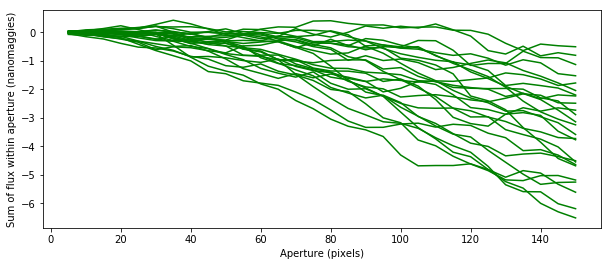

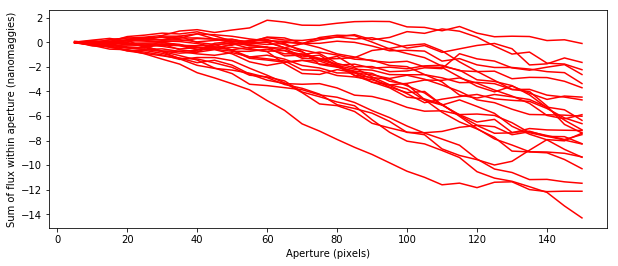

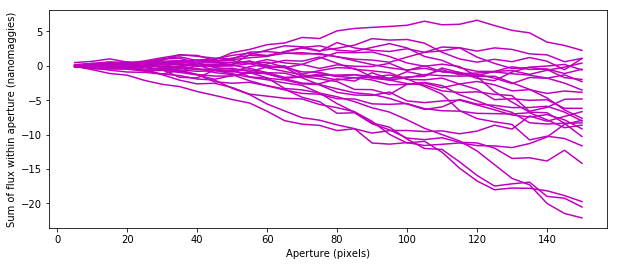

In [47]:
for ib,band in enumerate('grz'):
    for skyflux in skyfluxes:
        plt.plot(apertures, skyflux[ib,:], '-', color='grm'[ib])
    plt.xlabel('Aperture (pixels)')
    plt.ylabel('Sum of flux within aperture (nanomaggies)')
    plt.show()